In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat

In [2]:
subject_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '11', '12', '13']

In [3]:
wli = []
bli = []
for subject_id in subject_list:
    dir_path = f"analyses_results/sub-{subject_id}/mvpa/correlations/"
    wc = pd.read_csv(dir_path+'within_correlations.csv')
    wc['participant_id'] = subject_id
    wli.append(wc)

    bc = pd.read_csv(dir_path+'between_correlations.csv')
    bc['participant_id'] = subject_id
    bli.append(bc)
within_correlations = pd.concat(wli).drop('Unnamed: 0', axis = 1)
between_correlations = pd.concat(bli).drop('Unnamed: 0', axis = 1)

In [4]:
within_correlations_melt = within_correlations.melt(id_vars=['participant_id', 'runs', 'block_type', 'ROIs'], var_name = 'correlations', value_name='corr')

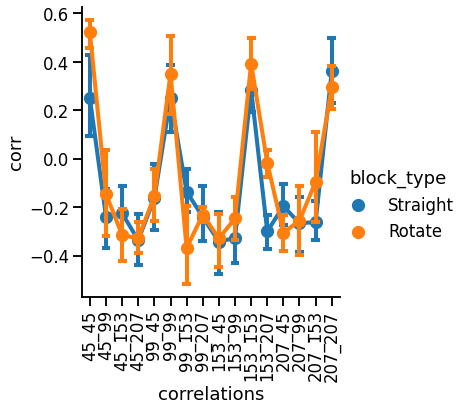

In [7]:
sns.set_context('talk')
ax = sns.catplot(x = 'correlations', y = 'corr', hue = 'block_type',
            kind = 'point', capsize = 0.3,
            data = within_correlations_melt.loc[((within_correlations_melt.participant_id == '02') & (within_correlations_melt.ROIs == 'v1'))])
ax.set_axis_labels().set_xticklabels(rotation = 90)
plt.savefig('plots_for_bb/within_correlations/within_corr_dir_pairs_v1.png', dpi = 600, bbox_inches = 'tight')

In [19]:
away = []
for i in within_correlations_melt.correlations.str.split('_').values:
    away.append(np.abs((int(i[0]) - int(i[1]))/54))
    
within_correlations_melt['targets_away'] = away

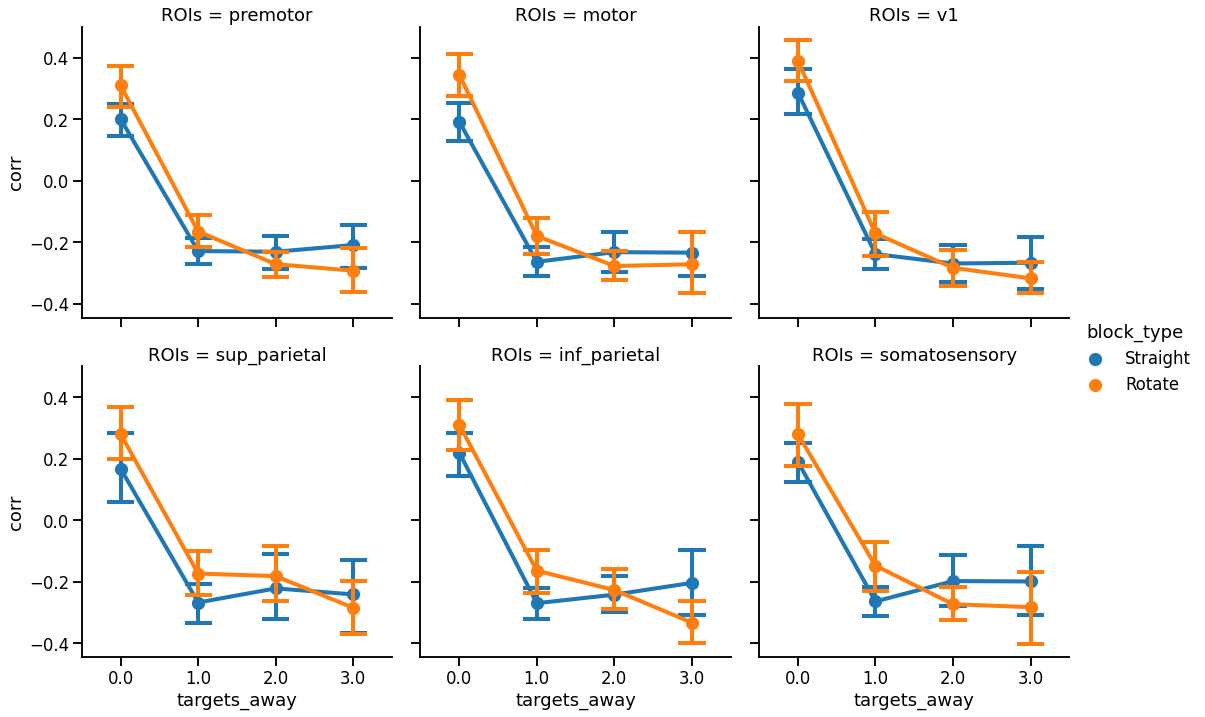

In [63]:
sns.set_context('talk')
sns.catplot(x = 'targets_away', y = 'corr', hue = 'block_type',col = 'ROIs', col_wrap=3, 
            kind = 'point', capsize = 0.3,
            data = within_correlations_melt.loc[((within_correlations_melt.participant_id == '02'))])
plt.savefig('plots_for_bb/within_correlations/within_corr_targ_away_all.png', dpi = 600)

# Between Blocks

In [8]:
between_correlations_melt = between_correlations.melt(id_vars=['participant_id', 'run_pairs', 'ROIs'], var_name = 'correlations', value_name='corr')

In [26]:
away = []
for i in between_correlations_melt.correlations.str.split('_').values:
    away.append(np.abs((int(i[0]) - int(i[1]))/54))
    
between_correlations_melt['targets_away'] = away

In [17]:
aim = []
for i in between_correlations_melt.correlations.str.split('_').values:
    aim.append((int(i[0]) - (int(i[1]) - 90)))
between_correlations_melt['aim_diff'] = aim

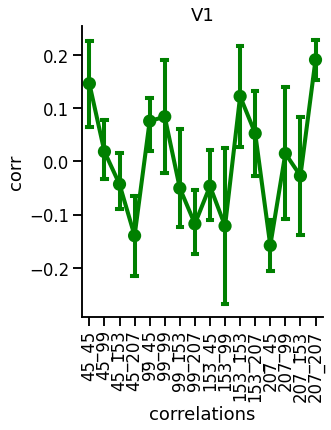

In [23]:

ax = sns.catplot(x = 'correlations', y = 'corr',   color = 'g',
            kind = 'point', capsize = 0.3,
            data = between_correlations_melt.loc[((between_correlations_melt.ROIs == 'v1') & (between_correlations_melt.participant_id == '02'))])
ax.set_axis_labels().set_xticklabels(rotation = 90)
plt.title('V1')
plt.savefig('plots_for_bb/bw_correlations/mean_centered/bw_corr_all_pairs_v1.png', dpi = 600, bbox_inches = 'tight')

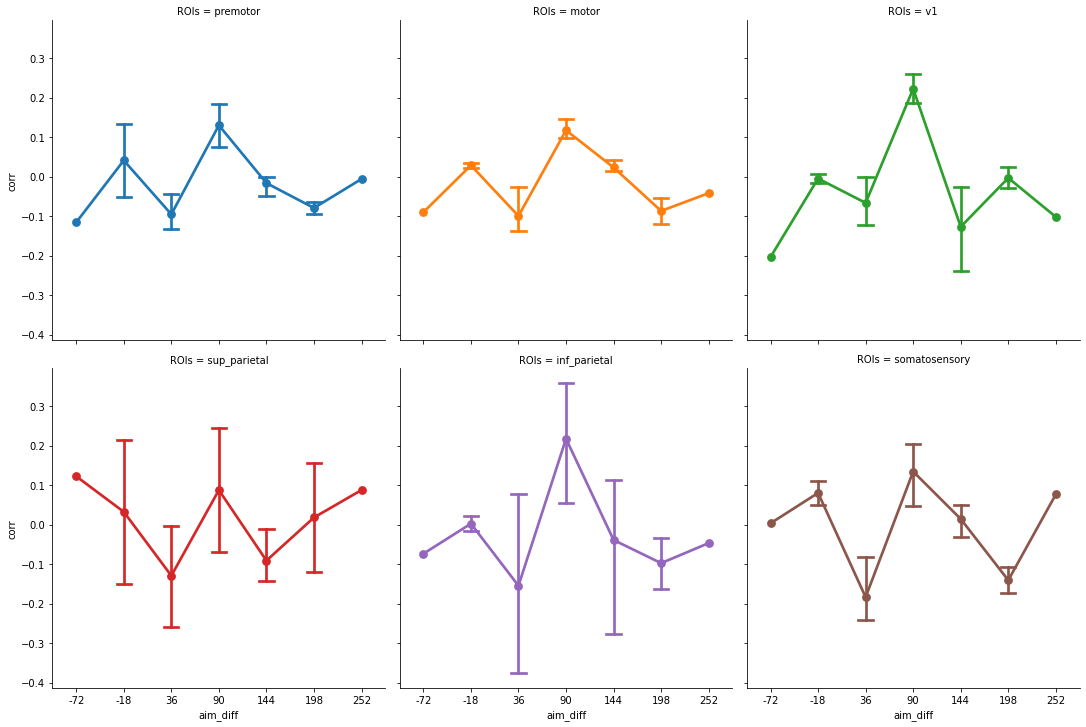

In [55]:
sns.catplot(x = 'aim_diff', y = 'corr', hue = 'ROIs', col = 'ROIs', col_wrap=3, 
            kind = 'point', capsize = 0.3,
            data = between_correlations_melt.loc[((between_correlations_melt.participant_id == '02') & (between_correlations_melt.run_pairs == 2))])
#plt.savefig('plots_for_bb/aim_diff_all_participants_first_pair.png', dpi = 600)

In [4]:
kl_div_svm = pd.read_csv('kl_divergence_svm.csv').drop('Unnamed: 0', axis = 1)

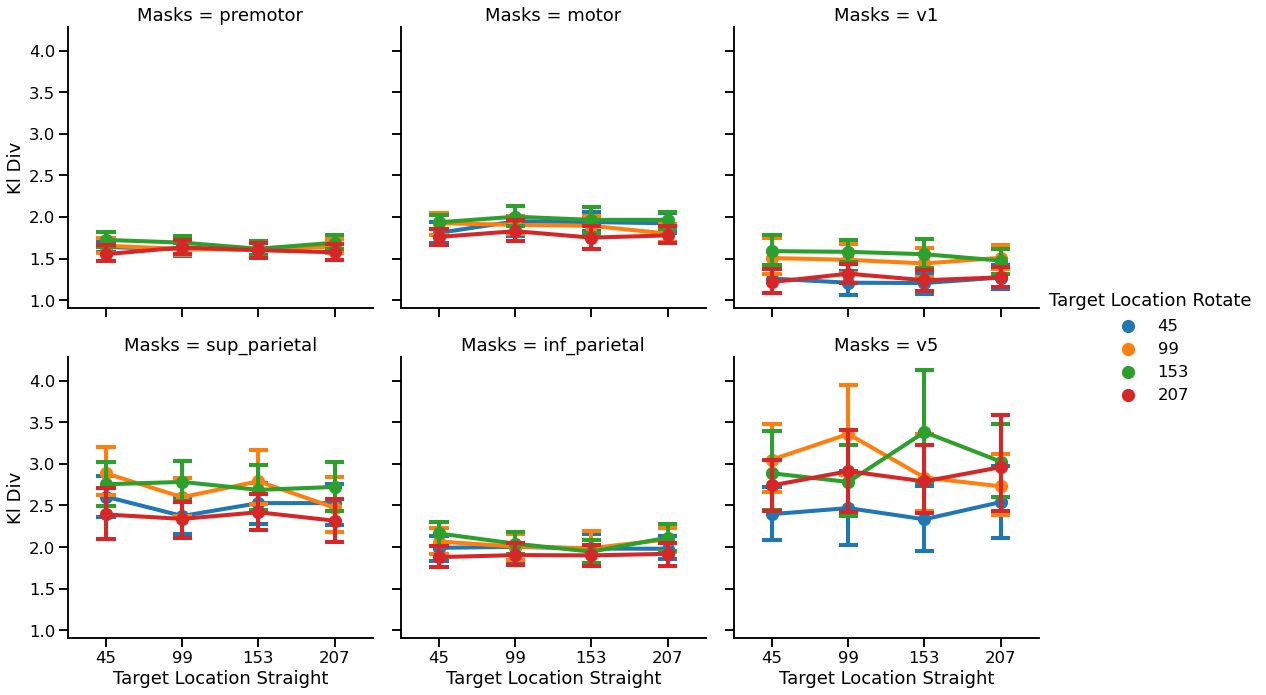

In [7]:
sns.set_context('talk')
sns.catplot(x = 'Target Location Straight', y = 'Kl Div', hue = 'Target Location Rotate', col = 'Masks',
            data = kl_div_svm,
            kind = 'point', capsize = 0.2, col_wrap=3           
           )

In [124]:
weight_weight_init = pd.read_csv('rot_weight_str_data_corr_svm_early_prep_cv_mean.csv').drop('Unnamed: 0', axis = 1)
weight_weight_late = pd.read_csv('rot_weight_str_data_corr_svm_late_prep_cv_mean.csv').drop('Unnamed: 0', axis = 1)

len(weight_weight_init)

1728

In [125]:
weight_weight = pd.concat([weight_weight_init, weight_weight_late]).reset_index().drop('index', axis =1)
weight_weight['phase'] = np.repeat(['Early', 'Late'], len(weight_weight_init))

In [126]:
weight_weight['aim direction'] = weight_weight['Target Location Rotate'] - 90
weight_weight['aim difference'] = weight_weight['aim direction'] - weight_weight['Target Location Straight']


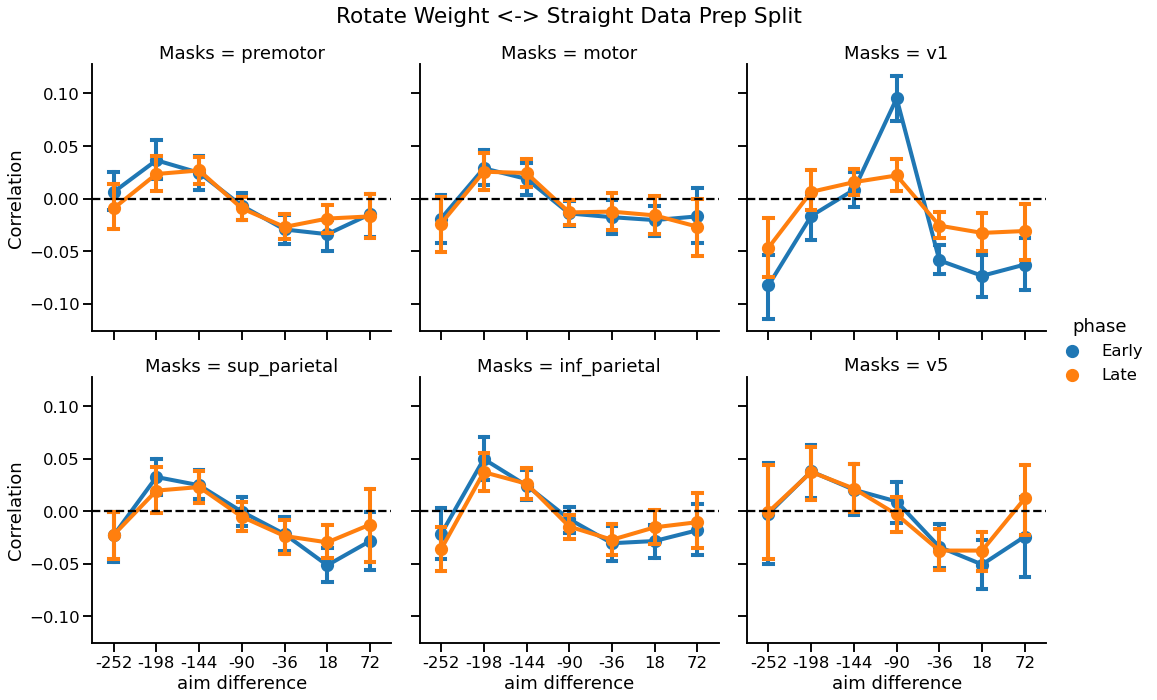

In [128]:
sns.set_context('talk')
g = sns.catplot(x = 'aim difference', y = 'Correlation',  col = 'Masks', hue = 'phase',
            data = weight_weight,
            kind = 'point', capsize = 0.2, col_wrap=3           
           )
for col in range(6):
    g.axes[col].axhline(0, ls = '--', color = 'black')
    
g.fig.suptitle('Rotate Weight <-> Straight Data Prep Split')
g.fig.subplots_adjust(top=.9)


In [93]:
weight_weight_corr_svm = pd.read_csv('weight_weight_corr_svm_prep_cv_mean_sq.csv').drop('Unnamed: 0', axis = 1)

In [94]:
weight_weight_corr_svm['aim direction'] = weight_weight_corr_svm['Target Location Rotate'] - 90
weight_weight_corr_svm['aim difference'] = weight_weight_corr_svm['aim direction'] - weight_weight_corr_svm['Target Location Straight']


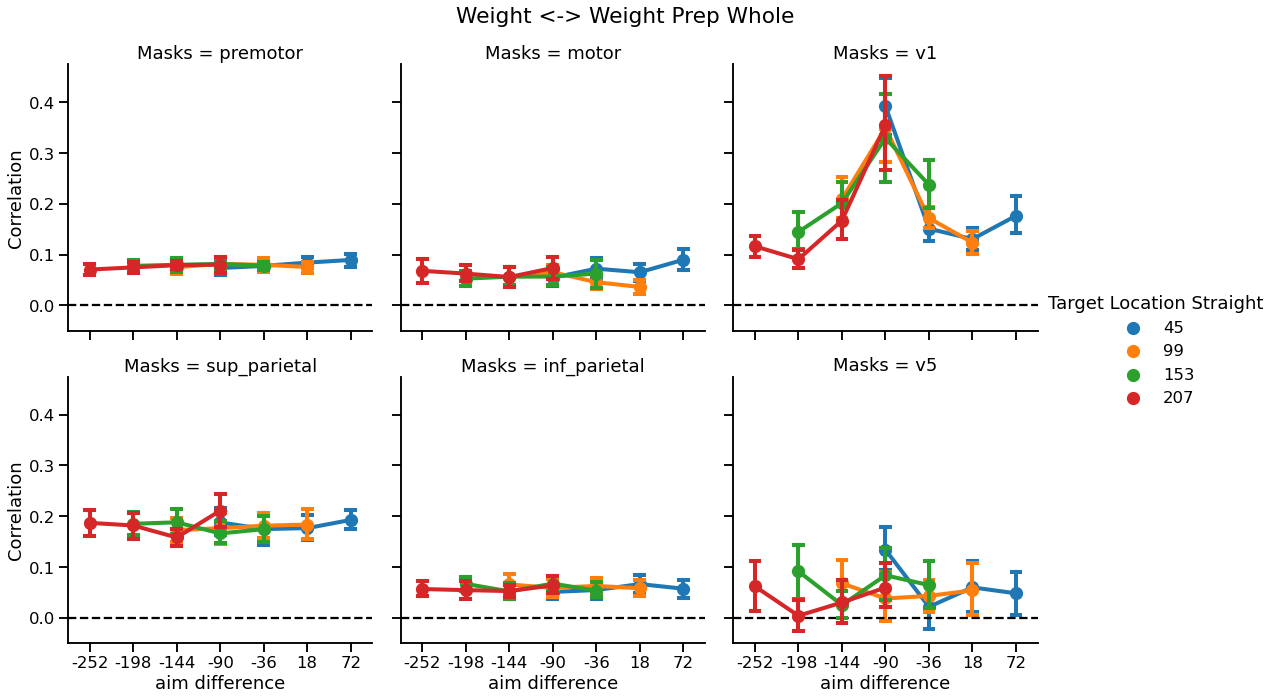

In [97]:
sns.set_context('talk')
g = sns.catplot(x = 'aim difference', y = 'Correlation', hue = 'Target Location Straight', col = 'Masks',
            data = weight_weight_corr_svm,
            kind = 'point', capsize = 0.2, col_wrap=3           
           )
for col in range(6):
    g.axes[col].axhline(0, ls = '--', color = 'black')
g.fig.suptitle('Weight <-> Weight Prep Whole')
g.fig.subplots_adjust(top=.9)


In [118]:
prep_accuracies = pd.read_csv('prep_accuracies_cv.csv').drop('Unnamed: 0', axis = 1)
prep_accuracies = prep_accuracies.rename(columns = {'Straight Shooter Train Accuracy': 'Straight Shooter', 'Rotated Train Accuracy': 'Rotated'})

In [119]:
prep_accuracies_melt = prep_accuracies.melt(id_vars=['Participants', 'Masks'], var_name='Block Type', value_name='Accuracies')

Text(0.5, 1.0, 'Cross Validation Accuracies of the best estimator')

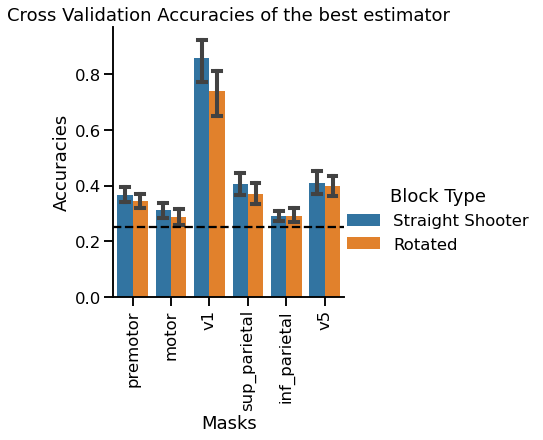

In [123]:
g = sns.catplot(x = 'Masks', y = 'Accuracies', hue = 'Block Type', 
         data = prep_accuracies_melt, 
         kind = 'bar', capsize = 0.2        
        )
g.set_xticklabels(rotation = 90)
g.axes[0][0].axhline(y = 0.25, ls = '--', color = 'black')
plt.title('Cross Validation Accuracies of the best estimator')